## Assigment 2 
## Huaijin Xin

In [91]:
import pandas as pd
passholder = pd.read_csv("/Users/xinhuaijin/Desktop/assignments/passhold.csv")

### part 1
#### A

In [92]:
passholder.drop(columns=['passholderID'], inplace=True)

In [11]:
passholder.head()

,visits23,ride_avg,game_spend_avg,avg_duration,inquiries_365,discounts_23,merch_spend_average,online_spend_average,food_spend_average
0,3,5.8,14.8,129.4,2,3,13.6,24.5,17.3
1,7,6.1,17.2,328.7,7,3,14.0,25.3,17.4
2,7,4.9,15.7,379.6,4,1,13.4,24.7,17.6
3,1,4.5,26.7,247.6,3,9,13.2,22.7,22.2
4,3,2.7,16.3,82.4,3,0,13.2,23.2,16.0


Clustering is based on finding patterns and similarities in the features (variables) provided. Including a unique identifier like passholderID would not add any meaningful information for clustering. In the process of calculating Euclidean distance, the passholderID will produce noise which would affect the clustering results.

#### B

In [12]:
passholder.describe()

,visits23,ride_avg,game_spend_avg,avg_duration,inquiries_365,discounts_23,merch_spend_average,online_spend_average,food_spend_average
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,5.857500,5.052375,18.855750,235.569875,3.936250,2.948750,14.934625,24.013750,19.058875
std,2.465724,1.959060,4.028328,101.832402,2.004922,1.725499,2.163230,1.158064,3.100098
min,1.000000,-1.600000,6.000000,60.400000,0.000000,0.000000,8.200000,21.200000,9.400000
25%,4.000000,3.800000,16.200000,146.875000,2.000000,2.000000,13.400000,23.200000,17.075000
50%,6.000000,5.100000,18.800000,240.350000,4.000000,3.000000,14.900000,24.000000,19.100000
75%,7.000000,6.400000,21.400000,320.175000,5.000000,4.000000,16.400000,24.900000,21.100000
max,15.000000,11.400000,33.000000,410.000000,15.000000,11.000000,21.400000,28.800000,29.200000


This helps analysts gain an overall sense of the distribution, central tendency, and spread of the data. 
It's valuable because it gives a quick snapshot of the data's characteristics, allowing analysts to identify
potential outliers, understand the scale of the variables, and make informed decisions about data preprocessing
and model building.



#### C

In [16]:
#a
passholder.isnull().sum()

visits23                0
ride_avg                0
game_spend_avg          0
avg_duration            0
inquiries_365           0
discounts_23            0
merch_spend_average     0
online_spend_average    0
food_spend_average      0
dtype: int64

There is no missing value in the dataset

In [19]:
#b
(passholder < 0).any()

visits23                False
ride_avg                 True
game_spend_avg          False
avg_duration            False
inquiries_365           False
discounts_23            False
merch_spend_average     False
online_spend_average    False
food_spend_average      False
dtype: bool

In [26]:
passholder['ride_avg'] =passholder['ride_avg'].clip(lower=0)

In [27]:
(passholder < 0).any()

visits23                False
ride_avg                False
game_spend_avg          False
avg_duration            False
inquiries_365           False
discounts_23            False
merch_spend_average     False
online_spend_average    False
food_spend_average      False
dtype: bool

There is impossible value in ride_avg column which is less than 0. I handel it by setting all variables less than 0 to be 0.

In [31]:
passholder['visits23'].apply(lambda x: isinstance(x, int)).all()

True

All variables in visits23 are all integers so no impossible value in this column

In [32]:
passholder['inquiries_365'].apply(lambda x: isinstance(x, int)).all()

True

Also no possible value in inquiries_365

#### D

a. The data needs to be standardized because for example, inquiries_365 and average_duration are apparently not in the same scale. This is crucial because k-means uses distances between data points, and variables with larger scales can dominate the clustering process.

In [37]:
#b 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(passholder)
passholder = pd.DataFrame(scaled_data, columns=passholder.columns)

In [38]:
passholder.head()

,visits23,ride_avg,game_spend_avg,avg_duration,inquiries_365,discounts_23,merch_spend_average,online_spend_average,food_spend_average
0,-1.159614,0.382063,-1.007437,-1.043246,-0.966353,0.029720,-0.617345,0.420144,-0.567716
1,0.463643,0.536173,-0.411284,0.915115,1.529071,0.029720,-0.432321,1.111385,-0.535439
2,0.463643,-0.080265,-0.783880,1.415269,0.031817,-1.130090,-0.709858,0.592955,-0.470884
3,-1.971242,-0.285745,1.948490,0.118210,-0.467268,3.509151,-0.802370,-1.135146,1.013868
4,-1.159614,-1.210402,-0.634841,-1.505078,-0.467268,-1.709996,-0.802370,-0.703121,-0.987320


#### E

In [63]:
selected_variables = ['game_spend_avg', 'merch_spend_average', 'online_spend_average', 
                      'food_spend_average','discounts_23']
passholder_selected = passholder[selected_variables]

These variables collectively provide information about passholder spending habits, which could be a significant factor in clustering them.

#### F

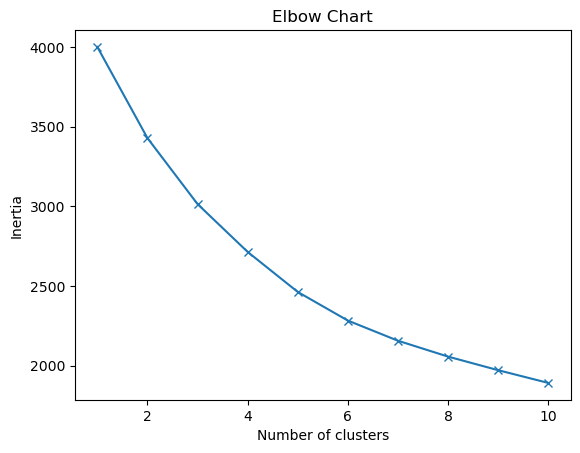

In [60]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=654,n_init=10).fit(passholder_selected)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Chart')
plt.show()

#### G
I want to use 6 clusters.

#### H

In [53]:
kmeans = KMeans(n_clusters=6, random_state=654,n_init=10)
clusters = kmeans.fit_predict(passholder_selected)

#### I

In [64]:
passholder_model = passholder_selected.copy()
passholder_model.loc[:, 'Cluster'] = clusters
passholder_model.groupby('Cluster').describe()

game_spend_avg                                                    \
                 count      mean       std       min       25%       50%   
Cluster                                                                    
0                131.0 -0.467221  0.785068 -2.746218 -1.007437 -0.436123   
1                132.0 -0.914665  0.727064 -3.193333 -1.237205 -0.833559   
2                152.0  1.084983  0.690724 -0.510643  0.607145  1.017000   
3                133.0  0.370327  0.764790 -1.653270 -0.088367  0.309068   
4                136.0 -0.094395  0.749055 -1.901667 -0.566532 -0.113207   
5                116.0 -0.167169  0.859608 -2.795897 -0.740410 -0.138047   

                            merch_spend_average            ...  \
              75%       max               count      mean  ...   
Cluster                                                    ...   
0        0.160030  0.979741               131.0 -0.889232  ...   
1       -0.429914  0.582305               132.0 -0.214707  ...   
2        1.482745  3.513393               152.0 -0.472186  ...   
3        0.855542  2.172048               133.0  0.651045  ...   
4        0.396007  1.700093               136.0  1.090389  ...   
5        0.507786  1.948490               116.0 -0.157576  ...   

        food_spend_average           discounts_23                      \
                       75%       max        count      mean       std   
Cluster                                                                 
0                 0.110106  1.885353        131.0 -0.191618  0.706431   
1                 0.303769  1.788521        132.0 -0.392029  0.698724   
2                 0.828274  2.853669        152.0 -0.470067  0.654080   
3                -0.567716  0.013274        133.0  0.073322  0.777448   
4                 1.272086  3.176442        136.0 -0.388153  0.686847   
5                 1.110700  3.273273        116.0  1.649455  0.766732   

                                                           
              min       25%       50%       75%       max  
Cluster                                                    
0       -1.709996 -0.550185  0.029720  0.609625  1.769436  
1       -1.709996 -1.130090 -0.550185  0.029720  1.189531  
2       -1.709996 -1.130090 -0.550185  0.029720  1.769436  
3       -1.709996 -0.550185  0.029720  0.609625  1.769436  
4       -1.709996 -1.130090 -0.550185  0.029720  1.189531  
5        0.609625  1.189531  1.189531  1.769436  4.668962  

[6 rows x 40 columns]

#### J

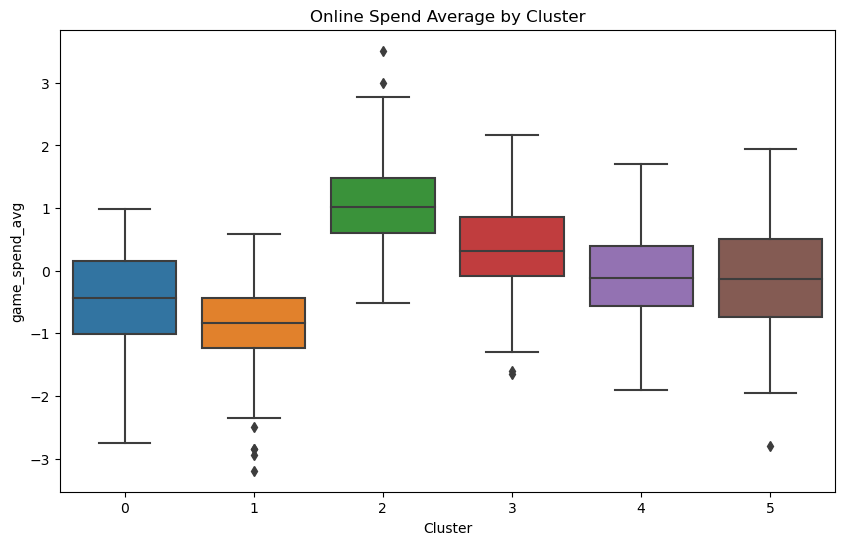

In [83]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='game_spend_avg', data=passholder_model)
plt.title('Game Spend Average by Cluster')
plt.show()

This box plot shows the features like means, 1st and 3rd quartile, max and min value of variable "game_spend_average" in different clusters.

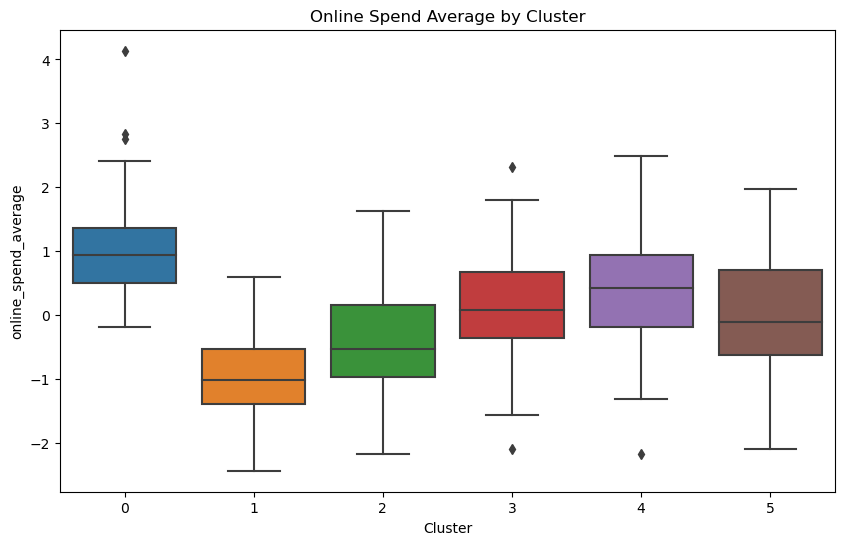

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='online_spend_average', data=passholder_model)
plt.title('Online Spend Average by Cluster')
plt.show()


This box plot shows the features like means, 1st and 3rd quartile, max and min value of variable "online_spend_average" in different clusters.

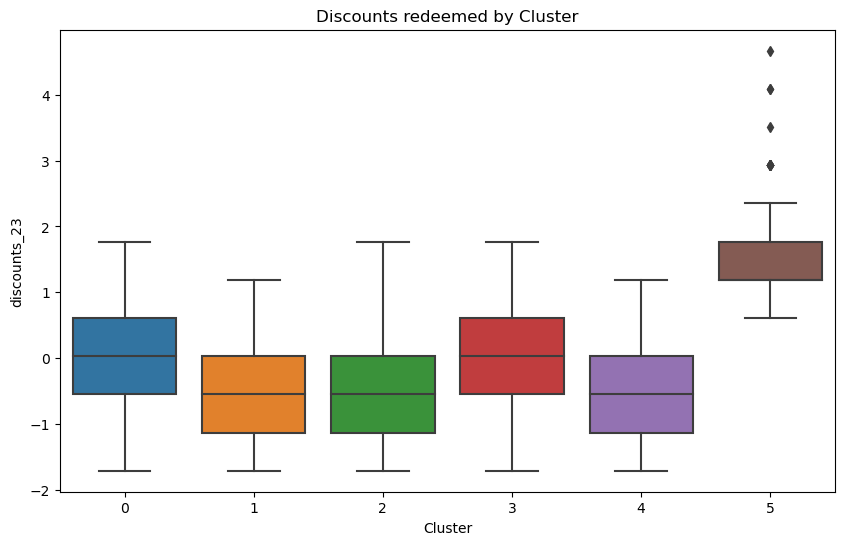

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='discounts_23', data=passholder_model)
plt.title('Discounts redeemed by Cluster')
plt.show()


This box plot shows the features like means, 1st and 3rd quartile, max and min value of variable "discounts_23" in different clusters.

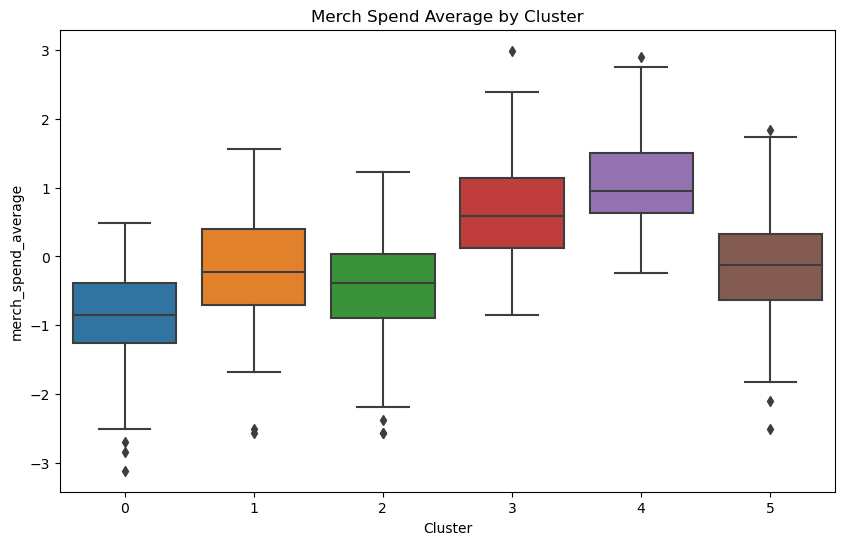

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='merch_spend_average', data=passholder_model)
plt.title('Merch Spend Average by Cluster')
plt.show()

The box plot shows the features like means, 1st and 3rd quartile, max and min value of variable "merch_spend_average" in different clusters.

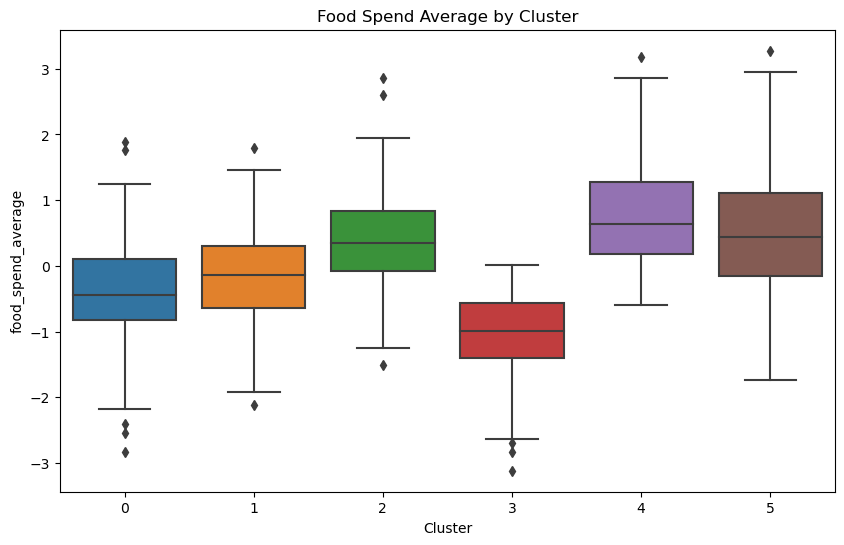

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='food_spend_average', data=passholder_model)
plt.title('Food Spend Average by Cluster')
plt.show()

The box plot shows the features like means, 1st and 3rd quartile, max and min value of variable "food_spend_average" in different clusters.

#### K

Cluster0 is online shoppers, cluster1 is low game and online spend shoppers, cluster2 is game shoppers, cluster3 is low food spend buyers, cluster4 is merchandise shoppers, cluster5 is discount shoppers.

#### L

In each kinds of perchases, Lobster Land should focus more on the group that have the higher spend. For example for cluster0 online shoppers, Lobster Land should send personalized online offers or discounts for online merchandise through targeted email campaigns because they spend more on online merchandises. And cluster3 is the group that Lobster Land should pay least engagement on advertising its food product because they have far less spend on food than other groups.

### Part 2

#### A

In [95]:
new_gold = pd.read_csv("/Users/xinhuaijin/Desktop/assignments/new_gold.csv")

#### B
Numeric Variables:

bundleID
coaster_sim
jukebox_run
avg_rating

Categorical Variables:

music_physical
sports_physical
retro_arcade
pinball
tough_skill
crane_prize

### C

In [98]:
new_gold.drop(columns=['bundleID'], inplace=True)
new_gold = pd.get_dummies(new_gold, drop_first=True)
new_gold.head()

,coaster_sim,jukebox_run,avg_rating,music_physical_Guitar Hero,music_physical_MaiMai Orange,sports_physical_Connect Four Hoops,sports_physical_QB Toss Challenge,retro_arcade_Mortal Kombat,retro_arcade_Ninja Turtles,retro_arcade_Simpsons,pinball_Indiana Jones,pinball_Jurassic Park,pinball_Monopoly,tough_skill_Reel Big Fish,tough_skill_Shape_Stack,crane_prizes_stuffed animals,crane_prizes_ticket bundles
0,60,1,5.29,1,0,1,0,1,0,0,0,1,0,0,1,1,0
1,60,1,4.20,1,0,1,0,1,0,0,0,1,0,0,1,0,1
2,60,1,3.85,1,0,1,0,1,0,0,0,1,0,0,1,0,0
3,60,2,6.35,1,0,1,0,1,0,0,0,1,0,0,1,1,0
4,60,2,5.87,1,0,1,0,1,0,0,0,1,0,0,1,0,1


The numeric input should be dummify because we would be imply that there is continuous range of options between the values which is incorrect.

### D

In [100]:
import statsmodels.api as sm

X = new_gold.drop('avg_rating', axis=1)  # Features (inputs)
y = new_gold['avg_rating']  # Target variable (output)

# Add a constant term to the features (for the intercept)
X = sm.add_constant(X)

# Fit the linear model
model = sm.OLS(y, X).fit()

#### E

In [101]:
coefficients = model.params
print(coefficients)

const                                 3.587935
coaster_sim                           0.000862
jukebox_run                           0.813188
music_physical_Guitar Hero           -0.107526
music_physical_MaiMai Orange         -0.417043
sports_physical_Connect Four Hoops    1.038414
sports_physical_QB Toss Challenge    -0.369090
retro_arcade_Mortal Kombat           -0.521406
retro_arcade_Ninja Turtles            0.145480
retro_arcade_Simpsons                 0.261352
pinball_Indiana Jones                -0.075127
pinball_Jurassic Park                -0.171096
pinball_Monopoly                      0.201017
tough_skill_Reel Big Fish            -0.009714
tough_skill_Shape_Stack              -0.899864
crane_prizes_stuffed animals         -0.030752
crane_prizes_ticket bundles           0.381748
dtype: float64


#### F


The linear model provides valuable insights into the factors influencing average ratings for different bundles at Lobster Land. From the coefficients, we can see that certain features have a notable impact on ratings. For instance, the presence of the Connect Four Hoops in the sports section is associated with a higher average rating, indicating its popularity among respondents. On the other hand, the Shape Stack in the tough skill section has a negative coefficient, suggesting it might not be as well-received.

However, it's crucial to consider that popularity isn't the sole factor to base decisions on. It's also important to balance popularity with operational feasibility, cost-effectiveness, and the overall park experience. For example, while certain features may be highly rated, they may require substantial resources or maintenance.

Furthermore, Lobster Land may consider conducting targeted surveys or focus groups to gain deeper insights into visitor preferences. This qualitative data, combined with the model's findings, can inform a comprehensive strategy for optimizing bundles and attractions. Remember, the goal is not only to offer the most popular options but to curate an experience that aligns with Lobster Land's brand identity and enhances customer satisfaction.

## Part3

#### A

In [102]:
from IPython.display import Image, display

display(Image(url='https://study.com/cimages/multimages/16/burgerad15179945781952220614.png'))

#### B

I think the consumer segment is people who love fast food because it is an advertisement about burger boudle. The types included in the segments might be beef lovers, chicken lovers, fries lovers, soda lovers and so on. Also the consumer segment can also be people who with car, because the advertisement enphasizes "Drive Thru". If the consumer segment is people who love fast food, I am one of them. The advertisement is effective which target is straight, that is people who love fast food, have car and love discount.